In [0]:
import os
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn import metrics, svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import cv2 
from PIL import Image
from skimage import color

In [0]:
import pickle

In [0]:
blnLoaData =  True
blnBuildModel = True

In [24]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
binary_flder = '/content/drive/Shared drives/DS8013/Data/Binary/'


In [0]:
X = np.load(binary_flder + 'X.npy')
y = np.load(binary_flder + 'y.npy')

In [27]:
X.shape

(27000, 64, 64, 3)

## Resize to smaller image and convert to gray scale

It was not possible to train the original size on Colab without timinig out


In [28]:
#resize images
X_img = [Image.fromarray(x, 'RGB') for x in X]

X_small = np.array([np.asarray(img.resize((32,32))) for img in X_img])
X_small.shape

(27000, 32, 32, 3)

In [29]:
X_gray =np.array([cv2.cvtColor(x, cv2.COLOR_BGR2GRAY) for x in X_small ])

X_gray.shape

(27000, 32, 32)

In [30]:
X_flatten = X_gray.flatten().reshape(len(X_gray), 32*32) 

X_flatten.shape

(27000, 1024)

Label encoder

In [0]:
#label encoding to integer
le = preprocessing.LabelEncoder()
le.fit(y)

#after encoding
y_le = le.transform(y)

In [0]:
# split data set into test and training using 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X_flatten,y_le,test_size = 0.2, random_state = 197)

In [33]:
X_train.shape

(21600, 1024)

In [42]:
model_flder = '/content/drive/Shared drives/DS8013/Model/'


if blnBuildModel:

  #models = []

  for g in [0.0001]:
    for c in [1]:
      # Create a classifier: a support vector classifier
      classifier = svm.SVC(gamma=g, C=1.0, verbose=True)
      classifier.fit(X_train, y_train)

      models.append({'model':classifier, 'gamma':g, 'C':c})
      
      pickle.dump(models, open(model_flder + 'SVM_Models.p' , "wb" ) )

else:

  models = pickle.load(open(model_flder + 'SVM_Models.p', 'rb'))


[LibSVM]

In [0]:
accuracy = []
for m in models:
  predicted = m['model'].predict(X_test)
  images_and_predictions = list(zip(X_test, le.inverse_transform(predicted), le.inverse_transform(y_test)))

  numCorrect = len([p for (p,a) in list(zip(predicted, y_test)) if p==a])
  accuracy.append( numCorrect / len(predicted))

In [39]:
accuracy

[0.2001851851851852,
 0.10944444444444444,
 0.10944444444444444,
 0.10944444444444444]

In [40]:
models

[{'C': 1,
  'gamma': 0.001,
  'model': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=True)},
 {'C': 1,
  'gamma': 0.1,
  'model': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=True)},
 {'C': 1,
  'gamma': 1,
  'model': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
      probability=False, random_state=None, shrinking=True, tol=0.001,
      verbose=True)},
 {'C': 1,
  'gamma': 10,
  'model': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_func

In [0]:

# Now predict the class of the digits:
predicted = classifier.predict(X_test)



In [0]:
print(len(predicted))
len([p for (p,a) in list(zip(predicted, y_test)) if p==a])


5400


591

In [0]:
X_test.shape 

(5400, 3072)

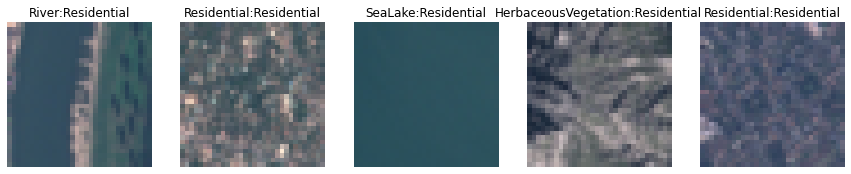

In [0]:
_, axes = plt.subplots(1, 5, figsize=(15,15))
images_and_predictions = list(zip(X_test, predicted, y_test))


for i, (image, prediction, actual) in enumerate(images_and_predictions[:5]):
    axes[i].set_axis_off()
    axes[i].imshow(image.reshape((32,32, 3)))
    axes[i].set_title(actual + ':' + prediction)

# print("Classification report for classifier %s:\n%s\n"
#       % (classifier, metrics.classification_report(y_test, predicted)))
# disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
# disp.figure_.suptitle("Confusion Matrix")
# print("Confusion matrix:\n%s" % disp.confusion_matrix)

In [0]:
 print('a           lllllllllllllllllllllllllllllllll')

In [0]:
print('bbbbbbb           b') 